In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree


In [2]:
df = pd.read_csv("D:/!Рабочая/5 курс 1 семестр/Инт анализ данных/train.csv",sep=",")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
from sklearn.utils import shuffle
df = shuffle(df)
df = df.head(1000)

df = df.drop('Unnamed: 0', axis=1)
df = df.drop('id', axis=1)

In [4]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
26312,Male,Loyal Customer,66,Personal Travel,Eco,427,4,5,4,3,...,5,5,4,1,1,5,5,0,0.0,neutral or dissatisfied
15116,Female,Loyal Customer,67,Personal Travel,Eco,2279,2,1,2,1,...,4,2,1,1,3,2,3,0,12.0,neutral or dissatisfied
22791,Female,Loyal Customer,42,Business travel,Business,3954,1,5,5,5,...,1,1,1,1,1,1,4,5,0.0,neutral or dissatisfied
2225,Female,Loyal Customer,49,Business travel,Business,328,4,5,5,5,...,4,4,3,4,3,4,4,0,0.0,neutral or dissatisfied
89527,Male,disloyal Customer,16,Business travel,Business,1121,5,0,5,4,...,3,5,5,4,5,4,3,8,9.0,satisfied


In [5]:
df.shape

(1000, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 26312 to 90719
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             1000 non-null   object 
 1   Customer Type                      1000 non-null   object 
 2   Age                                1000 non-null   int64  
 3   Type of Travel                     1000 non-null   object 
 4   Class                              1000 non-null   object 
 5   Flight Distance                    1000 non-null   int64  
 6   Inflight wifi service              1000 non-null   int64  
 7   Departure/Arrival time convenient  1000 non-null   int64  
 8   Ease of Online booking             1000 non-null   int64  
 9   Gate location                      1000 non-null   int64  
 10  Food and drink                     1000 non-null   int64  
 11  Online boarding                    1000 non-null   

In [7]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             2
satisfaction                         0
dtype: int64

In [8]:
df = df.dropna().copy()

df.shape



(998, 23)

In [9]:
df['satisfaction'].value_counts()

neutral or dissatisfied    559
satisfied                  439
Name: satisfaction, dtype: int64

In [10]:
df['satisfaction'] = pd.get_dummies(df['satisfaction'])
df['satisfaction']

26312    1
15116    1
22791    1
2225     1
89527    0
        ..
20858    1
51858    1
8189     1
16278    0
90719    1
Name: satisfaction, Length: 998, dtype: uint8

In [11]:
df.dtypes


Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [12]:
df['Gender'] = pd.get_dummies(df['Gender'])
df['Customer Type'] = pd.get_dummies(df['Customer Type'])
df['Type of Travel'] = pd.get_dummies(df['Type of Travel'])
df['Class'] = pd.get_dummies(df['Class'])
df.dtypes

Gender                                 uint8
Customer Type                          uint8
Age                                    int64
Type of Travel                         uint8
Class                                  uint8
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [13]:
corr = df.corr()

np.fill_diagonal(corr.values, 0)

corr.replace(0, np.nan, inplace=True)

corr

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,NaN,-0.003440,0.016125,0.028675,-0.031924,-0.005279,0.019313,0.034096,0.029787,-0.006054,...,-0.041714,-0.009550,-0.004804,-0.029243,-0.008306,-0.042392,0.009509,-0.035190,-0.028112,0.009608
Customer Type,-0.003440,NaN,0.279980,-0.302752,0.081089,0.191061,0.011444,0.216708,0.012969,-0.036582,...,0.083111,0.015361,0.030757,-0.071856,-0.022571,-0.023740,0.096779,-0.013988,-0.006447,-0.173125
Age,0.016125,0.279980,NaN,0.037225,0.130719,0.036605,0.034560,0.038853,0.050772,-0.004459,...,0.070048,0.073472,0.106511,-0.076130,-0.001379,-0.059314,0.085931,0.000669,-0.003449,-0.117063
Type of Travel,0.028675,-0.302752,0.037225,NaN,0.517874,0.238188,0.159626,-0.230734,0.171889,0.092740,...,0.191797,0.092104,0.170324,0.050359,0.021211,0.060505,0.099602,0.024740,0.019919,-0.472713
Class,-0.031924,0.081089,0.130719,0.517874,NaN,0.417567,0.052127,-0.051296,0.138473,0.052801,...,0.211584,0.249059,0.228264,0.142753,0.173087,0.153895,0.151500,0.052169,0.049085,-0.508091
Flight Distance,-0.005279,0.191061,0.036605,0.238188,0.417567,NaN,0.009265,0.014934,0.073824,0.008668,...,0.134853,0.107253,0.094133,0.053966,0.052865,0.036835,0.097581,-0.008113,-0.008857,-0.260360
Inflight wifi service,0.019313,0.011444,0.034560,0.159626,0.052127,0.009265,NaN,0.352266,0.719507,0.358450,...,0.261044,0.145124,0.206771,0.107940,0.077456,0.157645,0.195182,0.013645,0.008388,-0.305723
Departure/Arrival time convenient,0.034096,0.216708,0.038853,-0.230734,-0.051296,0.014934,0.352266,NaN,0.459231,0.392502,...,0.005951,0.034449,0.031493,0.055744,0.111318,0.023717,0.057360,-0.022829,-0.020941,0.008156
Ease of Online booking,0.029787,0.012969,0.050772,0.171889,0.138473,0.073824,0.719507,0.459231,NaN,0.471234,...,0.108522,0.032989,0.117606,0.020143,0.044183,0.042255,0.116435,-0.015282,-0.024852,-0.190879
Gate location,-0.006054,-0.036582,-0.004459,0.092740,0.052801,0.008668,0.358450,0.392502,0.471234,NaN,...,0.023703,-0.040596,0.046947,0.013853,0.008800,-0.020369,0.015085,0.031836,0.028874,-0.044485


<AxesSubplot:>

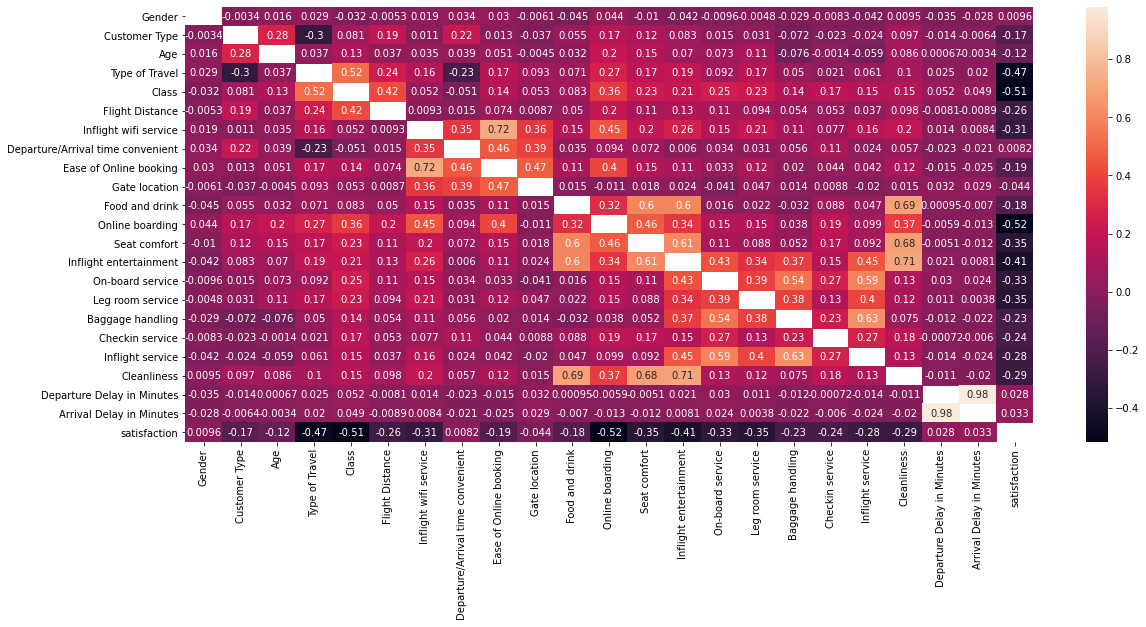

In [14]:
plt.figure(figsize = (19,8))
sns.heatmap(corr, annot=True)

In [15]:
corr.unstack().sort_values(kind='quicksort', na_position='first').drop_duplicates(keep='first')

Gender                      Gender                           NaN
satisfaction                Online boarding            -0.516657
Class                       satisfaction               -0.508091
Type of Travel              satisfaction               -0.472713
satisfaction                Inflight entertainment     -0.411920
                                                          ...   
Seat comfort                Cleanliness                 0.684728
Food and drink              Cleanliness                 0.694332
Cleanliness                 Inflight entertainment      0.708753
Ease of Online booking      Inflight wifi service       0.719507
Departure Delay in Minutes  Arrival Delay in Minutes    0.979559
Length: 254, dtype: float64

In [16]:
df.corr().abs()['satisfaction'].sort_values(ascending = False)


satisfaction                         1.000000
Online boarding                      0.516657
Class                                0.508091
Type of Travel                       0.472713
Inflight entertainment               0.411920
Leg room service                     0.353468
Seat comfort                         0.346235
On-board service                     0.332680
Inflight wifi service                0.305723
Cleanliness                          0.287126
Inflight service                     0.276209
Flight Distance                      0.260360
Checkin service                      0.235587
Baggage handling                     0.230326
Ease of Online booking               0.190879
Food and drink                       0.180617
Customer Type                        0.173125
Age                                  0.117063
Gate location                        0.044485
Arrival Delay in Minutes             0.032888
Departure Delay in Minutes           0.027935
Gender                            

In [17]:
df = df.drop('Gate location', axis=1)
df = df.drop('Gender', axis=1)
df = df.drop('Departure Delay in Minutes', axis=1)
df = df.drop('Departure/Arrival time convenient', axis=1)
df = df.drop('Arrival Delay in Minutes', axis=1)

In [18]:
df.shape


(998, 18)

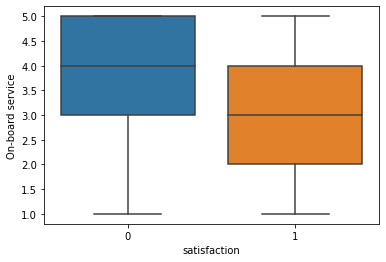

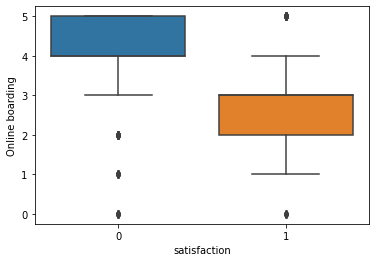

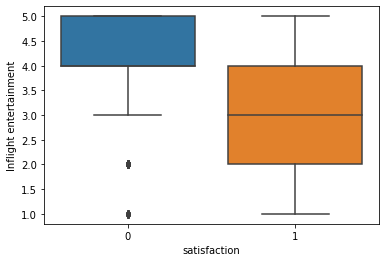

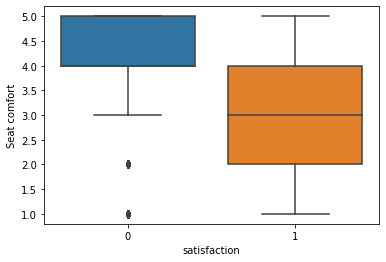

In [19]:
continuousColumns = ["On-board service","Online boarding", "Inflight entertainment", "Seat comfort"]
for item  in continuousColumns:
    sns.boxplot(x="satisfaction", y=item, data=df)
    plt.show()

<AxesSubplot:title={'center':'Seat comfort'}, xlabel='Seat comfort', ylabel='Count'>

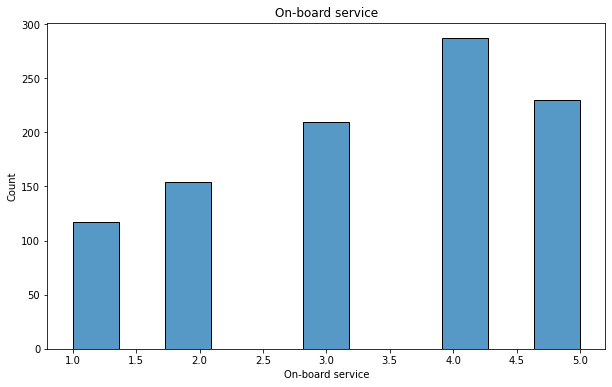

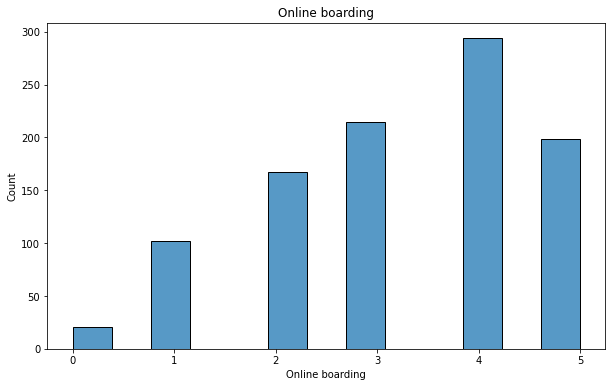

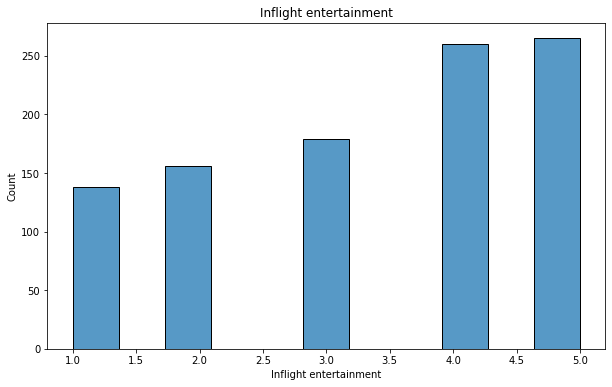

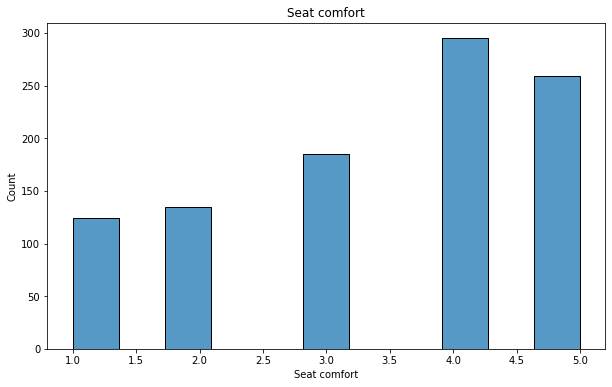

In [20]:
plt.figure(2, figsize=(10,6))
plt.title("On-board service")
sns.histplot(df['On-board service'])


plt.figure(3, figsize=(10,6)) 
plt.title("Online boarding")
sns.histplot(df['Online boarding'])

plt.figure(4, figsize=(10,6))
plt.title("Inflight entertainment")
sns.histplot(df['Inflight entertainment'])

plt.figure(5, figsize=(10,6)) 
plt.title("Seat comfort")
sns.histplot(df['Seat comfort'])

In [21]:
trgt = ["satisfaction"]
dfprep = df.columns.drop(trgt)
train,test = train_test_split(df,test_size = 0.33,random_state= 12)
xTrain = train[dfprep]
yTrain = train[trgt]
xTest  = test[dfprep]
yTest = test[trgt]

In [25]:
param_grid ={'n_neighbors': [3,5,7,9,11]}
knnModel = KNeighborsClassifier() 
grid_search=GridSearchCV(knnModel, param_grid,cv=5, return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)


In [26]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)


The best score is 0.5912916619907979
The best parameters are:
 KNeighborsClassifier(n_neighbors=3)


In [27]:
knnModel = KNeighborsClassifier(n_neighbors=3) 
knnModel.fit(xTrain,yTrain.values.ravel())
yPred= knnModel.predict(xTest)
accuracy_score(yTest,yPred)

0.6606060606060606

In [28]:
print(classification_report(yTest,yPred))


              precision    recall  f1-score   support

           0       0.61      0.59      0.60       141
           1       0.70      0.71      0.71       189

    accuracy                           0.66       330
   macro avg       0.65      0.65      0.65       330
weighted avg       0.66      0.66      0.66       330



<AxesSubplot:>

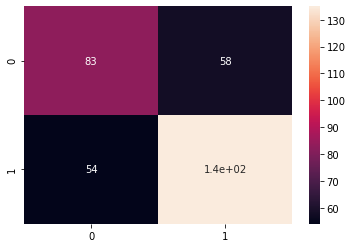

In [29]:

sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [30]:
param_grid ={'max_depth': [4, 6, 8, 10], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
dTree = DecisionTreeClassifier()
grid_search=GridSearchCV(dTree, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.5637669873263095
The best parameters are:
 DecisionTreeClassifier(max_depth=8, max_features=5)


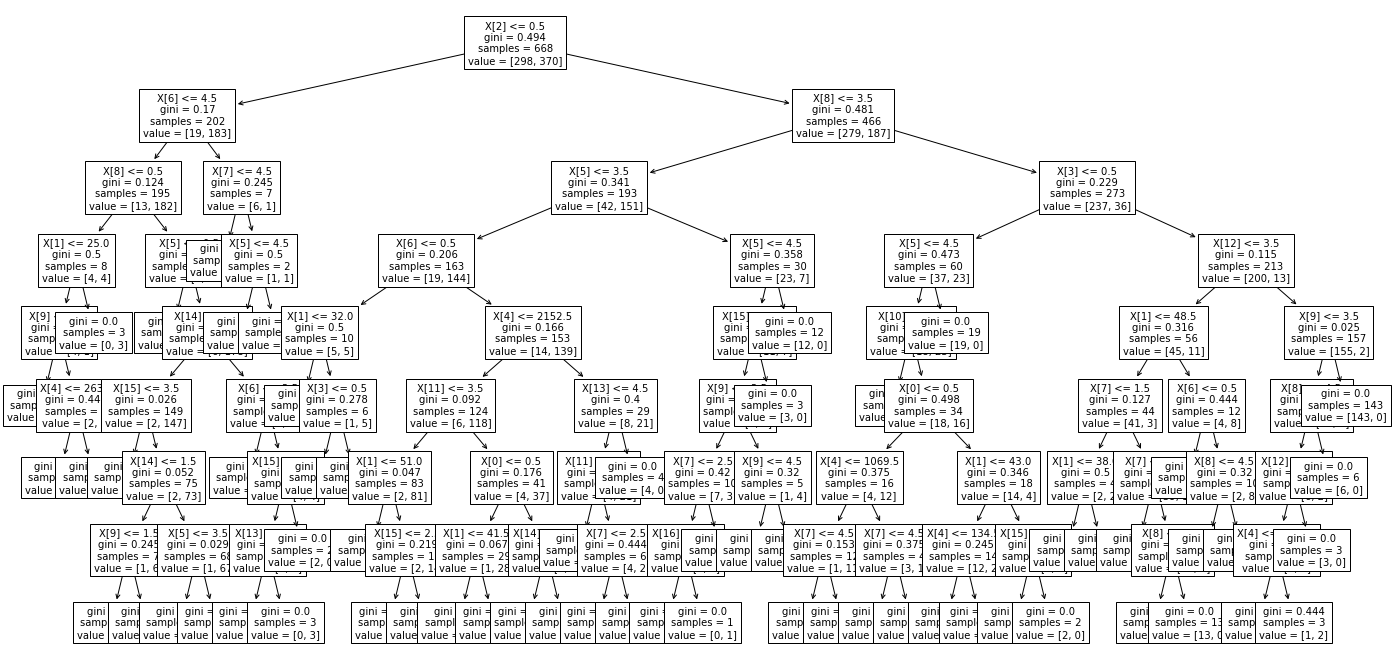

In [31]:
dTree = DecisionTreeClassifier(max_depth=8, max_features=5)
dTree.fit(xTrain, yTrain)


plt.figure(figsize=(24,12))
plot_tree(dTree, fontsize=10)
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       141
           1       0.90      0.90      0.90       189

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330



<AxesSubplot:>

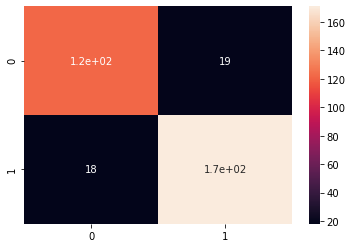

In [32]:
yPred = dTree.predict(xTest)
print(classification_report(yTest,yPred))
yPred= dTree.predict(xTest)
accuracy_score(yTest,yPred)
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [53]:
param_grid = {'C': [0.1, 1, 10, 25],'gamma': [0.1, 0.05, 0.03, 0.07, 0.01]}
SVC_clsfr = SVC(kernel='rbf')
grid_search = GridSearchCV(SVC_clsfr, param_grid, 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.5703288070923578
The best parameters are:
 SVC(C=10, gamma=0.03)


              precision    recall  f1-score   support

           0       0.67      0.21      0.32       141
           1       0.61      0.92      0.73       189

    accuracy                           0.62       330
   macro avg       0.64      0.57      0.53       330
weighted avg       0.63      0.62      0.56       330



<AxesSubplot:>

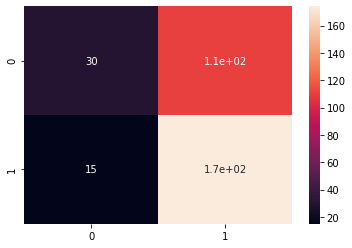

In [54]:
SVC_clsfr = SVC(kernel='rbf', C=10, gamma=0.03)
SVC_clsfr.fit(xTrain,yTrain.values.ravel())
yPred= SVC_clsfr.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [38]:
param_grid ={'max_depth': [4, 6, 8, 10, 12], 'n_estimators': [50, 100, 150, 200]}
rForest = RandomForestClassifier()
grid_search=GridSearchCV(rForest, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.7453565429836617
The best parameters are:
 RandomForestClassifier(max_depth=12, n_estimators=150)


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       141
           1       0.92      0.96      0.94       189

    accuracy                           0.93       330
   macro avg       0.94      0.93      0.93       330
weighted avg       0.93      0.93      0.93       330



<AxesSubplot:>

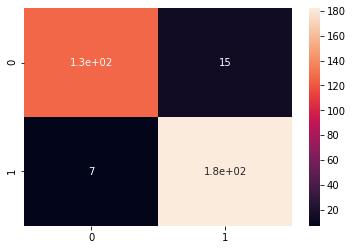

In [39]:
rForest = RandomForestClassifier(n_estimators = 150, random_state = 12)
rForest.fit(xTrain,yTrain.values.ravel())

yPred= rForest.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [40]:
param_grid={'n_estimators':[500,1000,2000],'learning_rate':[0.001,0.01,0.1]}
AdaB = AdaBoostClassifier()
grid_search=GridSearchCV(AdaB, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True,n_jobs=1)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.7149503741029164
The best parameters are:
 AdaBoostClassifier(learning_rate=0.01, n_estimators=2000)


              precision    recall  f1-score   support

           0       0.93      0.94      0.93       141
           1       0.95      0.95      0.95       189

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



<AxesSubplot:>

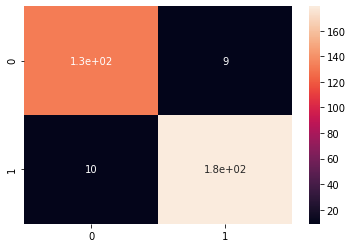

In [41]:
AdaB = AdaBoostClassifier(n_estimators=2000, learning_rate=0.01)
AdaB.fit(xTrain,yTrain.values.ravel())

yPred= AdaB.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)